# Реализация бинарного дерева поиска


_Про бинарное дерево смотреть тетрадку:_ [__BinaryTrees__](https://github.com/nasoboleva/Lyceum-Graphs-Course/blob/master/labs/BinaryTrees.ipynb)

### Класс вершины дерева

Простейшая вершина бинарного дерева должна обладать следующими свойствами:

1. В вершине хранится информация об объекте, который эта вершина содержит
2. В вершине хранится информация об ее потомках (левом и правом).


#### Реализуем класс вершины дерева

In [1]:
class TreeNode(object):
    """
    Tree node: left and right child + data which can be any object
    """
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

##  Бинарное дерево поиска

Бинарные деревья поиска полагаются то, что ключи меньше родительского находятся в левом поддереве, а больше - в правом. Мы будем называть это bst-свойством (от англ. binary search tree - прим. переводчика).

Анимация снизу иллюстрирует это свойство бинарных деревьев поиска, показывая ключи без ассоциированных с ними значений. Обратите внимание: им обладают и узлы-потомки, и узлы-предки. Все ключи в левых поддеревьях меньше ключа корня, а в правых - больше его.

![](http://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif)

Простейшое бинарное дерево поиска должна обладать следующими свойствами:


1. Левое поддерево вершины содержит только вершины, значения которых меньше значения текущей вершины.
2. Правое поддерево вершины содержит только вершины, значения которых больше значения текущей вершины.
3. Оба поддерева являются бинарными деревьями поиска.



#### Реализуем класс бинарного дерева поиска


In [2]:
class BinarySearchTree:
    
    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return int(self.size)

### Построение дерева. Добавление новых элементов. 

Предположим, что у нас уже есть бинарное дерево поиска. Для того, чтобы вставить в имеющееся дерево новую вершину, не нарушив при этом структуру, необходимо найти позицию для нового элемента, которая бы удовлетворяла всем неравенствам.

![](http://aliev.me/runestone/_images/bstput.png)

Рисунок иллюстрирует процесс вставки нового узла в двоичное дерево поиска. Слегка затенённые узлы - это те, что были посещены в процессе вставки.

1. Корень дерева имеет значение - 17.
2. Вставляемое значение 19 > 17 $\Rightarrow$ идем в правого потомка корневой вершины.
3. Текущее значения вершины - 35.
4. Вставляемое значение 19 < 35 $\Rightarrow$ идем в левого потомка корневой вершины.
5. Текущее значения вершины - 29.
4. Вставляемое значение 19 < 29 $\Rightarrow$ идем в левого потомка корневой вершины.
6. Левого потомка не существует - `None` $\Rightarrow$ нашли позицию для вставляемой вершины.
7. Добавляем соответвующую вершину, изменяем указатель на левого потомка `left` вершины 29 на вершину 19.


Будем спускаться посредством цикла по дереву, начиная от корня, в поисках места для вставки. 

__Дополнение:__ _Чтобы, найдя пустое место, иметь возможность заменить его на новую вершину, в коде кроме ссылки на текущую вершину $v$ мы поддерживаем ссылку на вершину-предка в переменной_ `parent`.

Если вставляемый ключ меньше текущего, идём влево; если больше, то идём вправо; если равен, то останавливаемся и выходим: ключ уже есть в дереве и вставлять не нужно. Когда переменная $v$ примет нулевое значение `None`, место для вставки найдено. 

Создаём новую вершину и в предке `parent` исправляем ссылку `left` или `right` в зависимости от того, влево или вправо мы двигались из `parent` до того, как попали в `None`. 


Отдельный случай — когда дерево изначально было пусто, тогда нужно обновить переменную `root` (создан новый корень).

#### Нерекурсивная реализация

In [5]:
def naive_insert(tree, new_value):
    parent = None
    v = tree.root
    while v is not None:
        parent = v
        
        !YOUR CODE HERE:
        # go left if new_value is lesser than current v value
        # go right if new_value is bigger than current v value
        # and return if value is already in the tree
 
    new_node = TreeNode(new_value)
    # don't forget to increase size of your tree
 
    if parent is None:
        tree.root = new_node
        
    !YOUR CODE HERE
    # if parent != None, change its left or its right child to new_node

In [6]:
tree = BinarySearchTree()
naive_insert(tree, 5)
assert (tree.length() == 1),"Something is teribly wrong with the size"
naive_insert(tree, 10)
naive_insert(tree, 4)
naive_insert(tree, 3)
assert (tree.length() == 4),"Something is teribly wrong with the size"
assert (tree.root.right.key == 10 and tree.root.left.key == 4), "Order is incorrect"
assert (tree.root.left.left.key == 3), "Order is incorrect"
print("Looks OK!")

Looks OK!


Теперь вспомним, что мы определяли бинарное дерево поиска некоторым рекурсивным правилом. 

Используя рекурсию, операцию вставки часто реализуют так:

Создаётся функция, параметрами которой являются корень поддерева (возможно `None`) и ключ, который нужно добавить. Функция осуществляет вставку ключа в поддерево и возвращает корень поддерева после вставки (корень мог поменяться в единственном случае: поддерево изначально не существовало и была создана новая вершина, которая становится корнем; иначе функция просто возвращает тот же корень, который был ей передан).

#### Рекурсивная реализация

In [7]:
def insert(subtree, new_value):
    if subtree is None:
        return TreeNode(new_value)
    if new_value < subtree.key:
        subtree.left = insert(subtree.left, new_value)
    elif new_value > subtree.key:
        subtree.right = insert(subtree.right, new_value)
    # subtree.key == new_value
    return subtree

### Попробуем построить дерево

Ниже функция рисования графа. Не обязательно, но симпатично.

In [8]:
from visualizer import draw_search_tree
%matplotlib inline

Добавим несколько вершин в дерево.

In [9]:
tree = BinarySearchTree()

tree.root = insert(tree.root, 5)

In [10]:
tree.root.key

5

In [11]:
tree.root = insert(tree.root, 10)
tree.root = insert(tree.root, 1)
tree.root = insert(tree.root, 3)
tree.root = insert(tree.root, 4)
tree.root = insert(tree.root, 20)
tree.root = insert(tree.root, 9)
tree.root = insert(tree.root, 0)

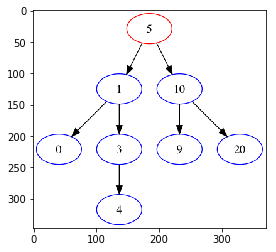

In [12]:
draw_search_tree(tree.root, 'first')

### Поиск ключа в дереве

Ранее упоминалось, что дерево - структура, в которой удобно хранить данные структурированно. От такой структуры данных нам прежде всего необходимо иметь возможность найти любой элемент по его значению.

![](https://neerc.ifmo.ru/wiki/images/e/e6/Bst_search.png)

Создаётся функция, которая принимает на вход корень некоторого поддерева (возможно, этот корень нулевой, то есть поддерева не существует) и ключ, который нужно найти. Функция возвращает ссылку на найденную вершину или `None`, если ключа нет. Алгоритм похож на процесс добавления элемента в дерево, мы так же спускаемся, сравнивая искомое значение с значением вершины, пока не найдем вершину с совпадающим значением.

#### Нерекурсивная реализация

In [13]:
def naive_search(tree, value):
    v = tree.root
    while v is not None:
        !YOUR CODE HERE:
        # go left if new_value is lesser than current v value
        # go right if new_value is bigger than current v value
        # and return vertex if you found the value

    return None

In [14]:
tree = BinarySearchTree()
naive_insert(tree, 5)
naive_insert(tree, 10)
naive_insert(tree, 4)
naive_insert(tree, 3)
vertex = naive_search(tree, 4)
assert (vertex is not None), "returned None, but the vertex exists there somewhere, check it"
assert (vertex.key == 4 and vertex.left.key == 3 and vertex.right is None), "found wrong vertex, check it"
vertex = naive_search(tree, 1)
assert (vertex is None), "there is no vertex in your tree, return None, please"
print("Looks OK!")

Looks OK!


Этот же алгоритм можно реализовать рекурсивно.
#### Рекурсивная реализация

In [15]:
def search(subtree, value):
    if subtree is None or subtree.key == value:
        return subtree
    elif value < subtree.key:
        return search(subtree.left, value)
    else:  # value > subtree.key
        return search(subtree.right, value)

Попробуем найти какой-нибудь элемент в дереве.

In [17]:
tree = BinarySearchTree()

tree.root = insert(tree.root, 5)
tree.root = insert(tree.root, 10)
tree.root = insert(tree.root, 1)
tree.root = insert(tree.root, 3)
tree.root = insert(tree.root, 4)
tree.root = insert(tree.root, 20)
tree.root = insert(tree.root, 9)
tree.root = insert(tree.root, 0)

print('Vertex with value=9', search(tree.root, 9))
print('Vertex with value=11', search(tree.root, 11))

Vertex with value=9 <__main__.TreeNode object at 0x105a6f748>
Vertex with value=11 None


### Удаление элементов из дерева

Мы научились добавлять новые элементы в дерево, но так же нам важно иметь возможность удалить тот или иной элемент из дерева.

![](http://www.zentut.com/wp-content/uploads/2013/04/bst-remove-node-with-2-children.png)


Для начала определим вспомогательную функцию, которая у вершины `parent` заменит вершину-сына `old` на вершину `new` (если в качестве `parent` будет передано значение `None`, то заменён будет корень всего дерева):

In [18]:
def replace_child(parent, old, new):
    if parent is None:
        tree.root = new
    elif parent.left == old:
        parent.left = new
    elif parent.right == old:
        parent.right = new

Для того, чтобы удалить вершину с ключом `value`, надо найти верштину с ключом `value`.

Для поиска вершины с ключом `value` можно было бы воспользоваться ранее разработанной функцией поиска, но она потребовала бы доработки: для удаления нужно знать не только ссылку на саму вершину `vertex` с ключом `value`, но и ссылку на её предка `parent`. Поэтому для понятности мы реализуем поиск ещё раз.

Когда мы ищем вершину с наименьшим ключом в правом поддереве, мы также вынуждены поддерживать при спуске ссылку на предка, чтобы потом иметь возможность эту вершину удобно удалить. 

Сначала проверяется число потомков вершины `vertex`. Если левое и/или правое поддерево отсутствует, это простой случай. Иначе, когда есть оба поддерева, действия отличаются в зависимости от того, выполняется удаление левое или правое. Рассмотрим случай правого удаления. В цикле ищем вершину с наименьшим ключом `min_node` в правом поддереве вершины `vertex`(вершина `min_node_parent` является предком вершины `min_node`).

#### Нерекурсивная реализация

In [19]:
def naive_delete(tree, value):
    parent = None
    vertex = tree.root
 
    while True:
        if vertex is None:
            return
        
        !YOUR CODE HERE
        # find value as in search function, remember its parent meanwhile
        # if found break
 
    result = None
    #don't forget to decrease size of your tree
 
    if vertex.left is None:
        result = vertex.right
    elif vertex.right is None:
        result = vertex.left
    else:
        min_node_parent = vertex
        min_node = vertex.right
        !YOUR CODE HERE
        # go left while left is not None find min_node and its parent
 
        result = vertex
        vertex.key = min_node.key
        replace_child(min_node_parent, min_node, min_node.right)
 
    replace_child(parent, vertex, result)

In [20]:
tree = BinarySearchTree()
naive_insert(tree, 5)
naive_insert(tree, 10)
naive_insert(tree, 4)
naive_insert(tree, 3)

naive_delete(tree, 4)
assert (tree.length() == 3),"Something is teribly wrong with the size"
assert (tree.root.left.key == 3), "The replacement is wrong, check it"
print("Looks OK!")

Looks OK!


При помощи рекурсии удаление из дерева вершины с заданным ключом обычно осуществляется так. Реализуется функция (будем называть её `delete`), которая принимает на вход вершину `vertex` и ключ `value`. Функция выполняет удаление вершины с ключом `value` в поддереве с корнем `vertex`, если такой ключ там есть. Функция возвращает новый корень поддерева после удаления (корень `vertex` может поменяться, если он сам окажется удалён).

В коде функции вначале делаются проверки ключа и выполняется спуск по дереву в поисках `value` (если меньше — идём влево, если больше — идём вправо). Когда функция `delete` оказывается вызванной для вершины `vertex` с ключом `value`, мы переходим непосредственно к удалению. 

Сначала проверяется число потомков вершины `vertex`. Если левое и/или правое поддерево отсутствует, это простой случай. Иначе, когда есть оба поддерева, действия отличаются в зависимости от того, выполняется удаление левое или правое. Рассмотрим случай правого удаления. Вызывается вспомогательная функция `find_min()`, которая ищет вершину с наименьшим ключом `min_key` в правом поддереве вершины `vertex`. Затем ключ в вершине `vertex` заменяется на найденный наименьший ключ `min_key`, а исходная вершина с ключом `min_key` удаляется через новый вызов функции `delete`.

#### Рекурсивная реализация

In [21]:
def find_min(vertex):
    if vertex.left is not None:
        return find_min(vertex.left)
    else:
        return vertex

In [22]:
def delete(vertex, value):
    if vertex is None:
        return None
 
    if value < vertex.key:
        vertex.left = delete(vertex.left, value)
        return vertex
    elif value > vertex.key:
        vertex.right = delete(vertex.right, value)
        return vertex
 
    # vertex.key == value
    if vertex.left is None:
        return vertex.right
    elif vertex.right is None:
        return vertex.left
    else:
        # both subtrees are present
        min_key = find_min(vertex.right).key
        vertex.key = min_key
        vertex.right = delete(vertex.right, min_key)
        return vertex

Функцию нужно вызывать из корня дерева и при этом присваивать корню возвращаемое значение:

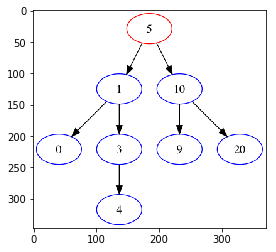

In [23]:
tree = BinarySearchTree()

tree.root = insert(tree.root, 5)
tree.root = insert(tree.root, 10)
tree.root = insert(tree.root, 1)
tree.root = insert(tree.root, 3)
tree.root = insert(tree.root, 4)
tree.root = insert(tree.root, 20)
tree.root = insert(tree.root, 9)
tree.root = insert(tree.root, 0)
draw_search_tree(tree.root, 'second')


tree.root = delete(tree.root, 10)
tree.root = delete(tree.root, 1)

In [24]:
tree.root.left.key

3

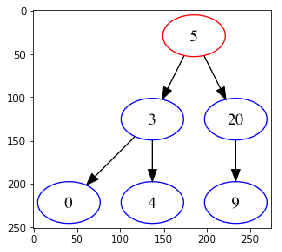

In [25]:
draw_search_tree(tree.root, 'third')

# Домашнее задание

Чаще всего от такой структуры данных, как бинарное дерево поиска так же требуется удобный способ получения элемента с минимальным/максимальным значением ключа. 

### Задание 1 (1 балл)

Реализуйте функцию, которая возвращает елемент с минимальным ключом в дереве. 

_Ваша реализация может быть как с использованием рекурсии, так и без неё._

In [ ]:
def get_min(tree):
    
    !YOUR CODE HERE
    # if the tree has no elements return None
    # you should start from the tree.root and then go to the minimal key in the tree
    # return TreeNode, not only the key
    
    return min_node

#### Задание 1.1 (0.5 баллов)

Постройте бинарное дерево поиска и проверьте процесс получения минимального элемента в дереве. 

In [ ]:
!YOUR CODE HERE

### Задание 2 (1 балл)

Реализуйте функцию, которая возвращает елемент с максимальным ключом в дереве. 

_Ваша реализация может быть как с использованием рекурсии, так и без неё._

In [ ]:
def get_max(tree):
    
    !YOUR CODE HERE
    # if the tree has no elements return None
    # you should start from the tree.root and then go to the maximal key in the tree
    # return TreeNode, not only the key
    
    return max_node

#### Задание 2.1 (0.5 баллов)

Постройте бинарное дерево поиска и проверьте процесс получения максимального элемента в дереве. 

In [ ]:
!YOUR CODE HERE

### Задание 3 (всего 7 баллов)

Построим более практическую задачу для использования __Binary Search Tree__.

Хотим структурировать хранение информации о пользователях телефонной сетью.

Каждый абонент определяется уникальным ключом - номером телефона.
В дальнейшей работе выберите удобный вам вариант представления: 
* (str) строковая переменная <span style="color:red">'+7-999-888-77-66'</span>
* (int) целочисленная переменная 89998887766 
* или любой другой удобный вам формат)

Помимо телефонного номера, необходимо хранить так же некоторую информацию о пользователе, а именно: фамилию пользователя, возраст пользователя.


#### Задание 3.1 (1 балл)
Постройте класс вершины дерева. Вершина должна содержать:
1. Ключ == телефонный номер
2. Фамилия пользователя
3. Возраст пользователя
4. Указатель на левого потомка
5. Указатель на правого потомка

In [ ]:
class PhoneUser(object):
    """
    Phone User: left and right child + data (Surname, Age, Phone Number(key))
    """

#### Задание 3.2 (2 балла)

Реализуйте функцию добавления элемента PhoneUser в BinarySearchTree.

__На этот раз вместо ключа, функции на вход подается объект PhoneUser, который в свою очередь хранит ключ==телефонный номер__


_Ваша реализация может быть как с использованием рекурсии, так и без неё._

In [ ]:
def insert_user(tree, user):
    """
    PhoneUser user: has different fields 
    """ 

#### Задание 3.3 (1 балл)

Реализуйте функцию поиска элемента PhoneUser в BinarySearchTree по значению телефонного номера.


_Ваша реализация может быть как с использованием рекурсии, так и без неё._

In [ ]:
def search_user(tree, phone):
    """
    Use phone as a key
    If there is no user with this phone number in the tree, return None
    """ 
    
    return phone_user

#### Задание 3.4 (2 балла)

Реализуйте функцию удаления элемента PhoneUser в BinarySearchTree по значению телефонного номера.


_Ваша реализация может быть как с использованием рекурсии, так и без неё._

In [ ]:
def delete_user(tree, phone):
    """
    Use phone as a key
    """ 

#### Задание 3.5 (1 балл)

Постройте дерево == телефонный справочник, продемонстрируйте процесс добавления, нахождения и удаления вершин в дереве.

In [ ]:
!YOUR CODE HERE

### <span style="color:red">!Бонусы</span>

1. За использование визуализатора (рисование деревьев) + 0.5 баллов
2. Использование рекурсивных реализаций + 0.5 баллов (за каждую рекурсивную реализацию функции)
3. Предложенный (письменно) вариант практической задачи, которая требует построения бинарного дерева поиска. То есть необходимо структурировать исходные данные по уникальным ключам + 1 балл.
4. Дополнительная реализация (как выше про телефонный справочник) вашей задачи + 1 балл. 


#### Итог:
Основная оценка за дз - 10 баллов. 

Их можно набрать решив полностью основную часть или некоторой комбинацией основной части и бонусов. Бонусы, полученные сверх 10 баллов можно будет использовать для поднятия оценок за другие домашние работы.

Максимальная оценки за дз - 15 баллов.